In [1]:
from __future__ import print_function, division

In [2]:
# Supress warnings
#import warnings

#warnings.simplefilter("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

### EDA Books

* [Exploratory Data Analysis](http://www.amazon.com/Exploratory-Data-Analysis-John-Tukey/dp/0201076160) by John Tukey

Other Authors on EDA:

* William Cleveland
* Edward Tufte

In [4]:
# Let's do a histogram with defaults

(array([  2.,   2.,  11.,  16.,  17.,  22.,  14.,   6.,   7.,   3.]),
 array([-2.62648427, -2.09294155, -1.55939883, -1.02585611, -0.4923134 ,
         0.04122932,  0.57477204,  1.10831476,  1.64185747,  2.17540019,
         2.70894291]),
 <a list of 10 Patch objects>)

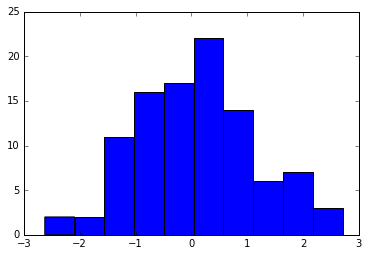

In [5]:
plt.hist(np.random.randn(100))

### Better Defaults

In [6]:
import seaborn as sns

(array([  1.,   0.,   5.,  12.,  21.,  20.,  22.,  12.,   3.,   4.]),
 array([-3.14217848, -2.58129414, -2.02040981, -1.45952548, -0.89864114,
        -0.33775681,  0.22312752,  0.78401186,  1.34489619,  1.90578052,
         2.46666486]),
 <a list of 10 Patch objects>)

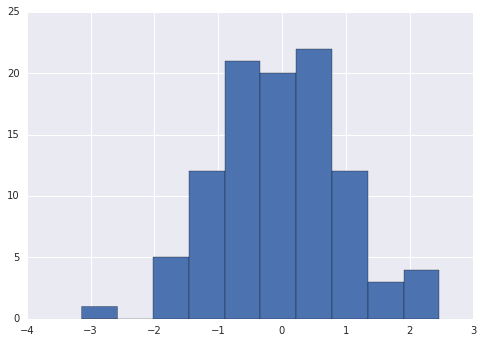

In [7]:
plt.hist(np.random.randn(100))

* What do you see different between the two plots?

## Seaborn

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

Source: [Seaborn Docs](http://stanford.edu/~mwaskom/software/seaborn/)

Seaborn comes with some sample datasets that we will use to explore (https://github.com/mwaskom/seaborn-data)

In [8]:
titanic = sns.load_dataset("titanic")

In [9]:
# This is our familiar Pandas dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.2+ KB


In [10]:
# Remove all rows that have null Age
titanic = titanic[titanic.age.notnull()]

### Histogram (Distributions)

In [11]:
# We can plot distribution of Age by just using Pandas
# We don't need Seaborn for that
# Plot an histogram of age

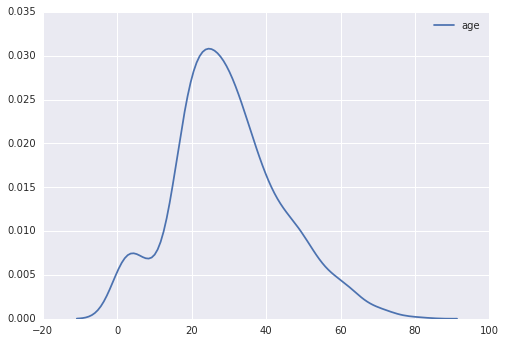

In [12]:
# But Seaborn adds some additional ways to look at distributions
sns.kdeplot(titanic.age)

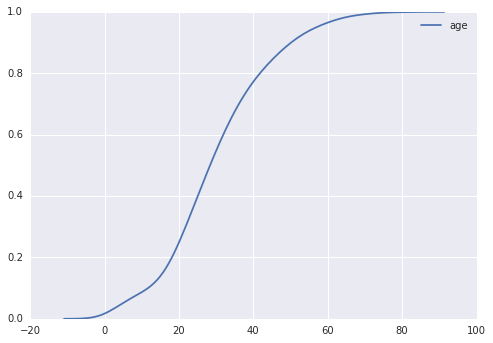

In [13]:
# Do a Cumulative Plot
sns.kdeplot(titanic.age, cumulative=True)

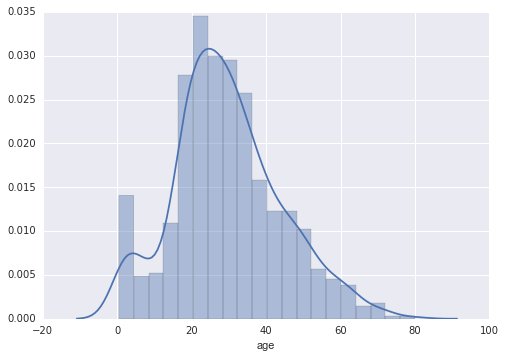

In [14]:
# Overlay Histogram and Dist Plot
sns.distplot(titanic.age)

### Box Plots

In [15]:
# Do a Boxplot of "age" with Pandas 
# Your code here

In [16]:
# Box plot "age" by "sex"
# Your code here

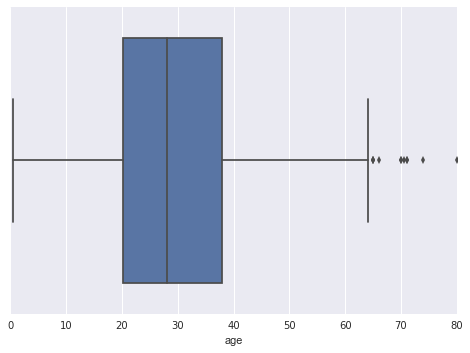

In [17]:
sns.boxplot(titanic.age)

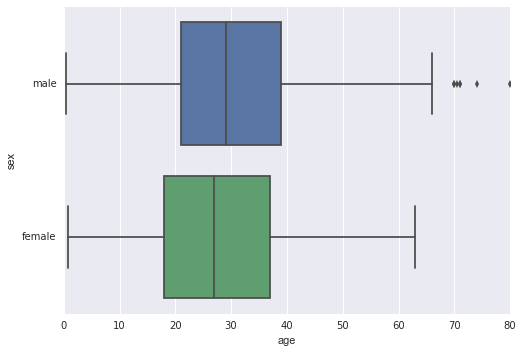

In [18]:
sns.boxplot(titanic.age, titanic.sex)

### Violin Plot

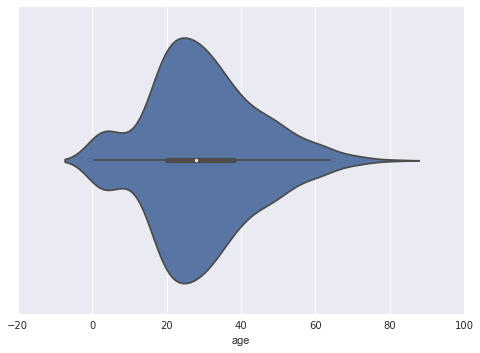

In [19]:
sns.violinplot(titanic.age)

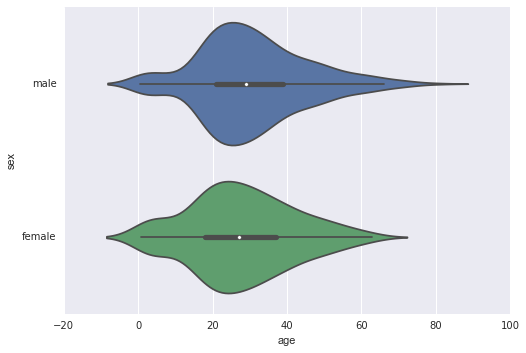

In [20]:
sns.violinplot(titanic.age, titanic.sex)

### Plot by Group

In [21]:
# Pandas Histogram of "age"
# Your code here

In [22]:
# Pandas histogram of "age" by "sex"

In [23]:
# Pandas histogram of "age" by "sex" and "survived"

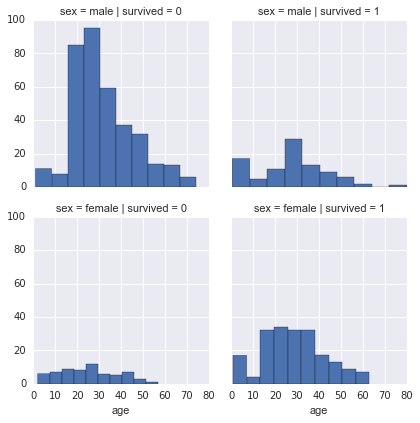

In [24]:
# Let's now look at Distribution of Age and Survived
# Now look at survived data
g = sns.FacetGrid(titanic, row='sex', col='survived', sharex=True, sharey=True)
g.map(plt.hist, "age")

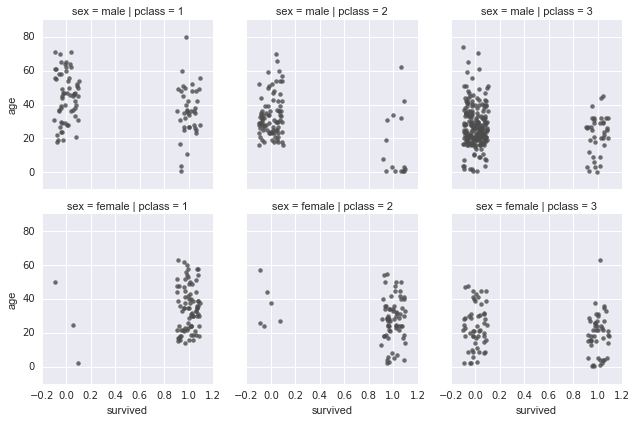

In [25]:
# Plot how many survived, by gender and class
grid_plot = sns.FacetGrid(titanic, row='sex', col='pclass')
grid_plot.map(sns.regplot, 'survived', 'age',color='.3', fit_reg=False, x_jitter=.1)

### Let's look at a IRIS Dataset

In [26]:
iris = sns.load_dataset("iris")

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Scatter Matrix

In [28]:
# Do a Scatter Plot with Pandas on two columns - "petal_length", "petal_width"

In [29]:
# Look at pair wise comparison (scatter matrix) between all numerical variables

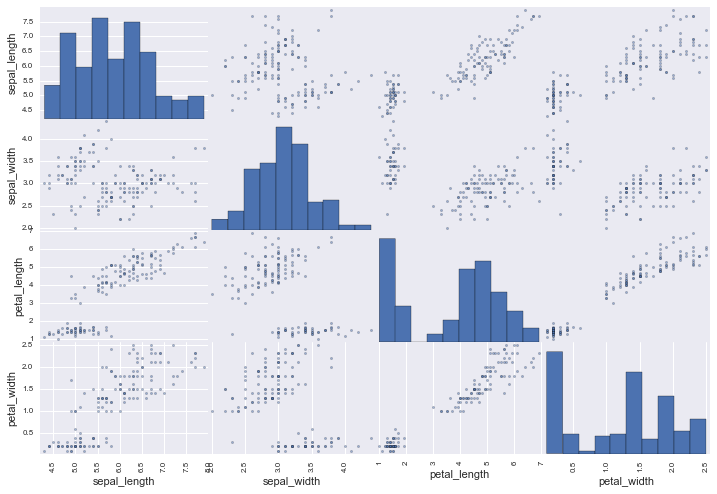

In [30]:
# Blow it up a little bit
pd.scatter_matrix(iris, figsize=(12,8));

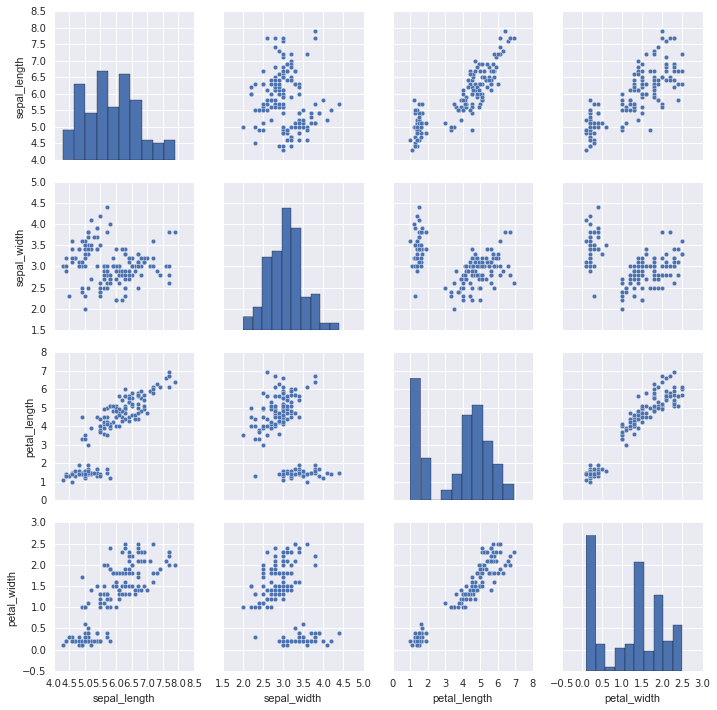

In [31]:
# Seaborn does this pair wise comparison Better
sns.pairplot(iris)

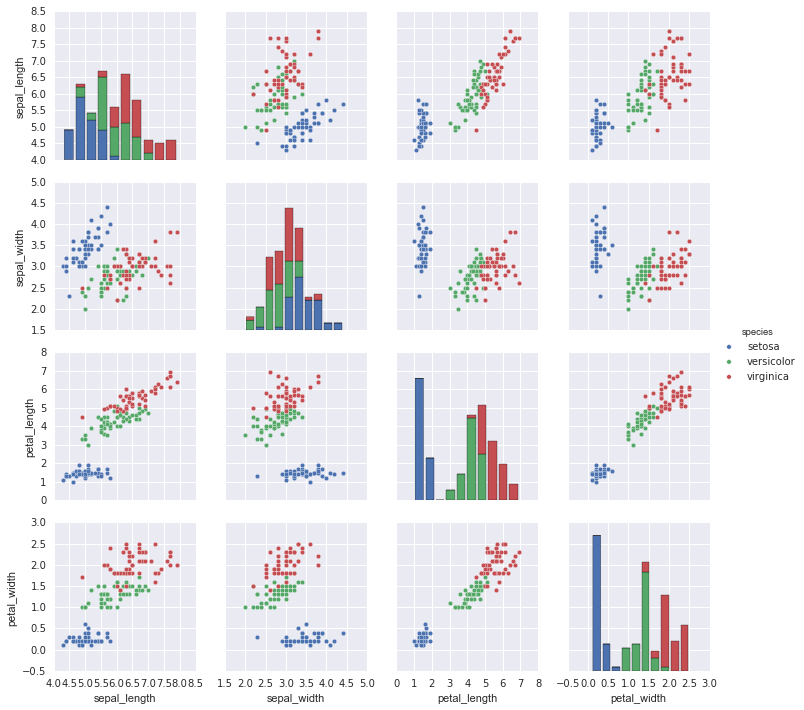

In [32]:
sns.pairplot(iris, hue="species")

### Joint Plot

* Multiple plots at once

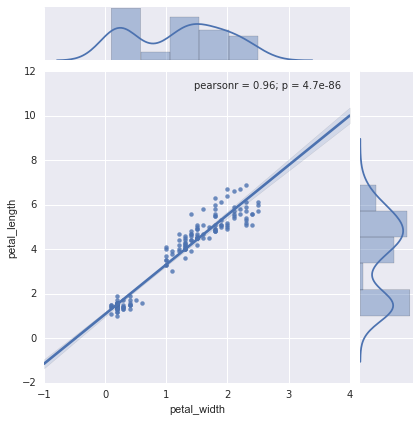

In [33]:
sns.jointplot("petal_width", "petal_length", kind="regplot", data=iris)